# Homework I

Gonçalo Bárias (ist1103124) & Raquel Braunschweig (ist1102624)

This Notebook only contains our solution for the programming section of the Homework (Part II). Our solution for the pen and paper section (Part I) can be found on the pdf report.

## II. Programming [9v]

**Consider the `column_diagnosis.arff` data available at the homework tab, comprising 6 biomechanical features to classify 310 orthopaedic patients into 3 classes (`normal`, `disk hernia`, `spondilolysthesis`).**

### 1) [1.5v]

**Apply `f_classif` from `sklearn` to assess the discriminative power of the input variables.
Identify the input variable with the highest and lowest discriminative power.
Plot the class-conditional probability density functions of these two input variables.**

In [94]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif

In [95]:
# Read the ARFF file and prepare data
data = loadarff("./data/column_diagnosis.arff")
df = pd.DataFrame(data[0])
df["class"] = df["class"].str.decode("utf-8")
X, y = df.drop("class", axis=1), df["class"]

In [96]:
# Apply f_classif
f_scores, _ = f_classif(X, y)

# Obtains the variables with the highest and lowest discriminative power.
h_disc_power_var = X.columns[np.argmax(f_scores)]
l_disc_power_var = X.columns[np.argmin(f_scores)]

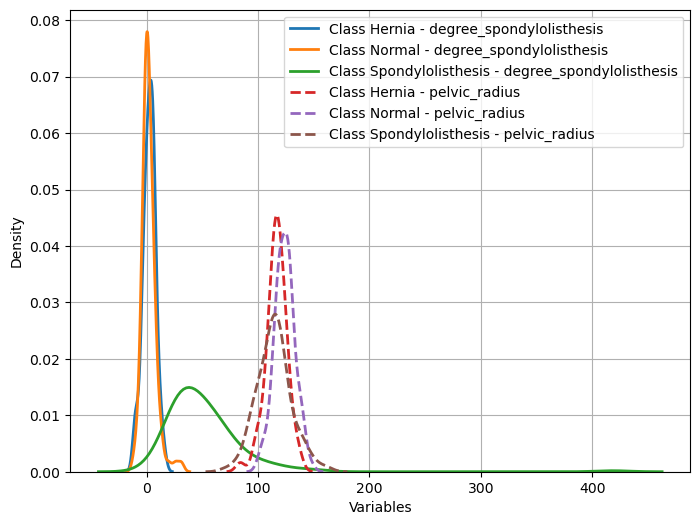

In [97]:
plt.figure(figsize=(8, 6))

# Plot for the highest discriminative power variable
for class_label in np.unique(y):
    class_data = X.loc[y == class_label, h_disc_power_var]
    sns.kdeplot(
        class_data,
        label=f"Class {class_label} - {h_disc_power_var}",
        linewidth=2,
    )

# Plot for the lowest discriminative power variable
for class_label in np.unique(y):
    class_data = X.loc[y == class_label, l_disc_power_var]
    sns.kdeplot(
        class_data,
        label=f"Class {class_label} - {l_disc_power_var}",
        linestyle="--",
        linewidth=2,
    )

plt.xlabel("Variables")
plt.ylabel("Density")

plt.legend()
plt.grid(True)
plt.show()

### 2) [4v]

**Using a stratified 70-30 training-testing split with a fixed seed (`random_state=0`), assess in a
single plot both the training and testing accuracies of a decision tree with depth limits in
`{1,2,3,4,5,6,8,10}` and the remaining parameters as default.**

***[Optional]* Note that split thresholding of numeric variables in decision trees is non-deterministic
in sklearn, hence you may opt to average the results using 10 runs per parameterization.**

In [98]:
import pandas as pd, matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split

In [99]:
# Read the ARFF file and prepare data
data = loadarff("./data/column_diagnosis.arff")
df = pd.DataFrame(data[0])
df["class"] = df["class"].str.decode("utf-8")
X, y = df.drop("class", axis=1), df["class"]

In [100]:
DEPTH_LIMIT = [1, 2, 3, 4, 5, 6, 8, 10]
training_accuracy, test_accuracy = [], []

# Split the dataset into a testing set (30%) and a training set (70%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0
)

for depth_limit in DEPTH_LIMIT:
    # Create and fit the decision tree classifier
    predictor = tree.DecisionTreeClassifier(
        max_depth=depth_limit, random_state=0
    )
    predictor.fit(X_train, y_train)

    # Use the decision tree to predict the outcome of the given observations
    y_train_pred = predictor.predict(X_train)
    y_test_pred = predictor.predict(X_test)

    # Get the accuracy of each test
    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    training_accuracy.append(train_acc)
    test_acc = metrics.accuracy_score(y_test, y_test_pred)
    test_accuracy.append(test_acc)

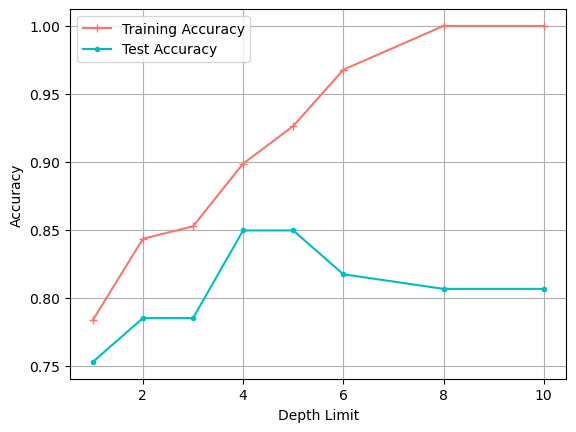

In [101]:
plt.plot(
    DEPTH_LIMIT, training_accuracy,
    label="Training Accuracy", marker="+", color="#f8766d"
)
plt.plot(
    DEPTH_LIMIT, test_accuracy,
    label="Test Accuracy", marker=".", color="#00bfc4"
)

plt.xlabel("Depth Limit")
plt.ylabel("Accuracy")

plt.legend()
plt.grid(True)
plt.show()

### 3) [1.5v]

**Comment on the results, including the generalization capacity across settings.**

The graphic shows that as the depth limit of the decision tree increases, the training accuracy rises
steadily until reaching 100%. This observation suggests that deeper trees can better fit the training data,
capturing complex patterns and achieving higher accuracy when evaluated on the dataset.

The testing accuracy initially improves as the depth limit increases, indicating improved generalization.
However, beyond a certain depth limit (around 4 or 5 in this case), the testing accuracy starts to decline.
Therefore, we conclude there is a loss in generalization capacity, which is caused by overfitting, implying
that, in this case, overly complex decision trees can fit noise in the training data, performing poorly on
new, unseen data.

The optimal depth limit appears to be around 4 or 5, which seems to be the point where the accuracy
is maximized for the testing data, striking a balance between model complexity and generalization to
new data, this way we can avoid both underfitting (model is too simple) and overfitting (model is too
complex).

### 4) [2v]

**To deploy the predictor, a healthcare team opted to learn a single decision tree
(`random_state=0`) using *all* available data as training data, and further ensuring that each leaf has
a minimum of 20 individuals in order to avoid overfitting risks.**

- **(a) Plot the decision tree.**

In [102]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np
from scipy.io.arff import loadarff
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [103]:
# Read the ARFF file and prepare data
data = loadarff("./data/column_diagnosis.arff")
df = pd.DataFrame(data[0])
df["class"] = df["class"].str.decode("utf-8")
X, y = df.drop("class", axis=1), df["class"]

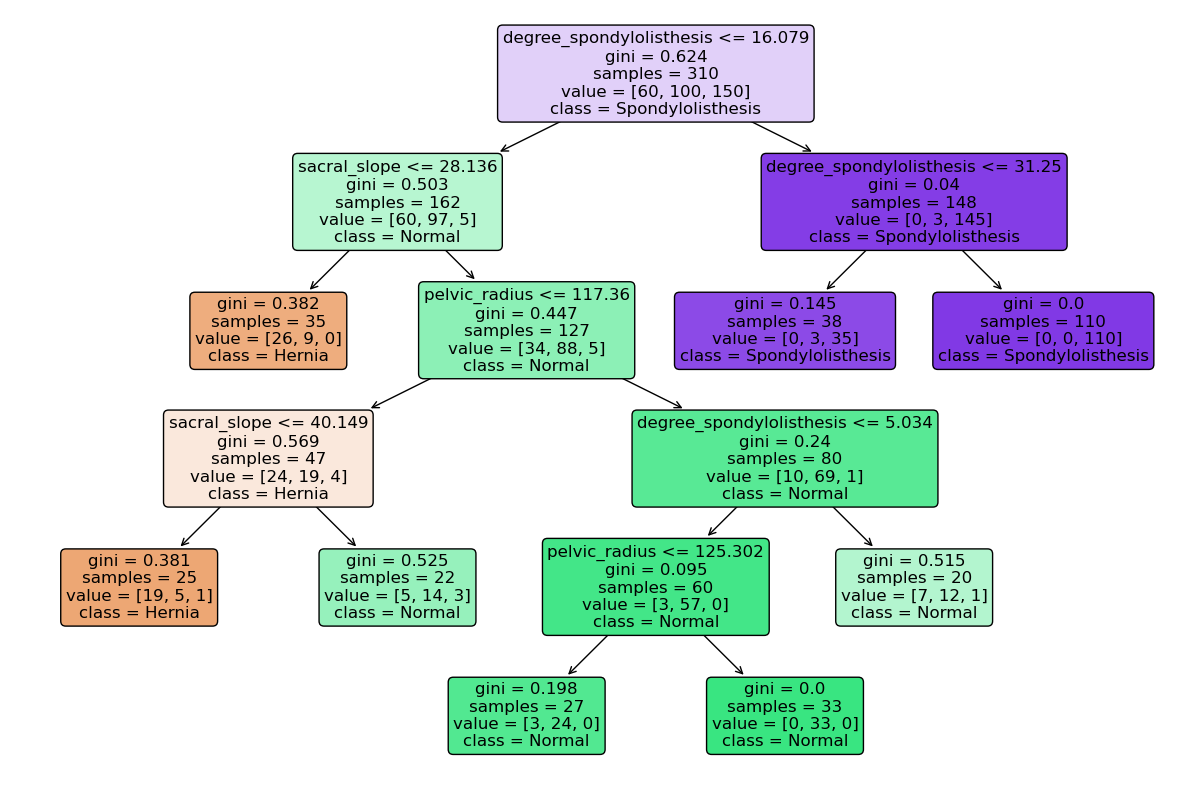

In [104]:
# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=20)
clf.fit(X, y)

# Set style and plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=list(X.columns), 
          class_names=list(np.unique(y)), rounded=True, fontsize=12)
plt.show()

- **(b) Characterize a hernia condition by identifying the hernia-conditional associations.**

The hernia condition can be characterized by:
- i. degree_spondilolysthesis $\leq 16.079$ and sacral_slope $\leq 28.136$
- ii. degree_spondilolysthesis $\leq 16.079$, sacral_slope $> 28.136$, pelvic_radius $\leq 117.36$ and sacral_slope $\leq 40.149$